<a href="https://colab.research.google.com/github/aysbt/DataScienceProject/blob/master/Marketing_Departman_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!cp gdrive/'My Drive'/'Colab Notebooks'/data/Marketing_data.csv .
data = pd.read_csv('Marketing_data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

* **CUSTID:** Identification of Credit Card holder 
* **BALANCE:** Balance amount left in customer's account to make purchases
* **BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES:** Amount of purchases made from account
* **ONEOFFPURCHASES:** Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
* **CASH_ADVANCE:** Cash in advance given by the user
* **PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFF_PURCHASES_FREQUENCY:** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_INSTALLMENTS_FREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
* **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
* **PURCHASES_TRX:** Number of purchase transactions made
* **CREDIT_LIMIT:** Limit of Credit Card for user
* **PAYMENTS:** Amount of Payment done by user
* **MINIMUM_PAYMENTS:** Minimum amount of payments made by user  
* **PRC_FULL_PAYMENT:**Percent of full payment paid by user
* **TENURE:**Tenure of credit card service for user

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


*  Mean balance is \$1564 
*  Balance frequency is frequently updated on average ~0.9
*  Purchases average is $1000
*  One off purchase average is ~$600
*  Average purchases frequency is around 0.5
*  Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
*  Average credit limit ~ 4500
*  Percent of full payment is 15%
*  Average tenure is 11 years



## VISUALIZE AND EXPLORE DATASET

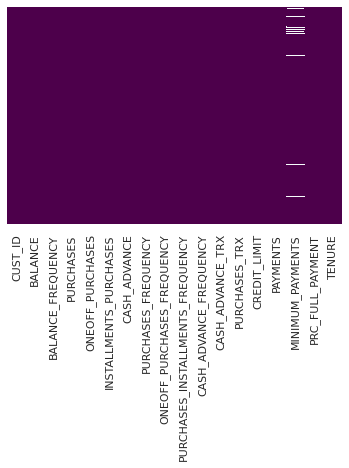

In [6]:
# Let's see if we have any missing data.
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='BuPu_r')

In [7]:
#We have 313 missing value for MINIMUM_PAYMENTS
#We have also 1 mising value for CREDIT_LIMIT
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

In [9]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
#Let's Check if we have any duplicated row
data.duplicated().sum()

0

* distplot combines the matplotlib.hist function with seaborn kdeplot()
* KDE Plot represents the Kernel Density Estimate
* KDE is used for visualizing the Probability Density of a continuous variable. 
* KDE demonstrates the probability density at different values in a continuous variable. 

In [11]:
#Let's drop the CUST_ID column because there isn't any usefull information 
data.drop('CUST_ID', axis=1, inplace=True)

In [12]:
for col_name in data.columns:
  print(" ".join(col_name.split(sep='_')).title())

Balance
Balance Frequency
Purchases
Oneoff Purchases
Installments Purchases
Cash Advance
Purchases Frequency
Oneoff Purchases Frequency
Purchases Installments Frequency
Cash Advance Frequency
Cash Advance Trx
Purchases Trx
Credit Limit
Payments
Minimum Payments
Prc Full Payment
Tenure


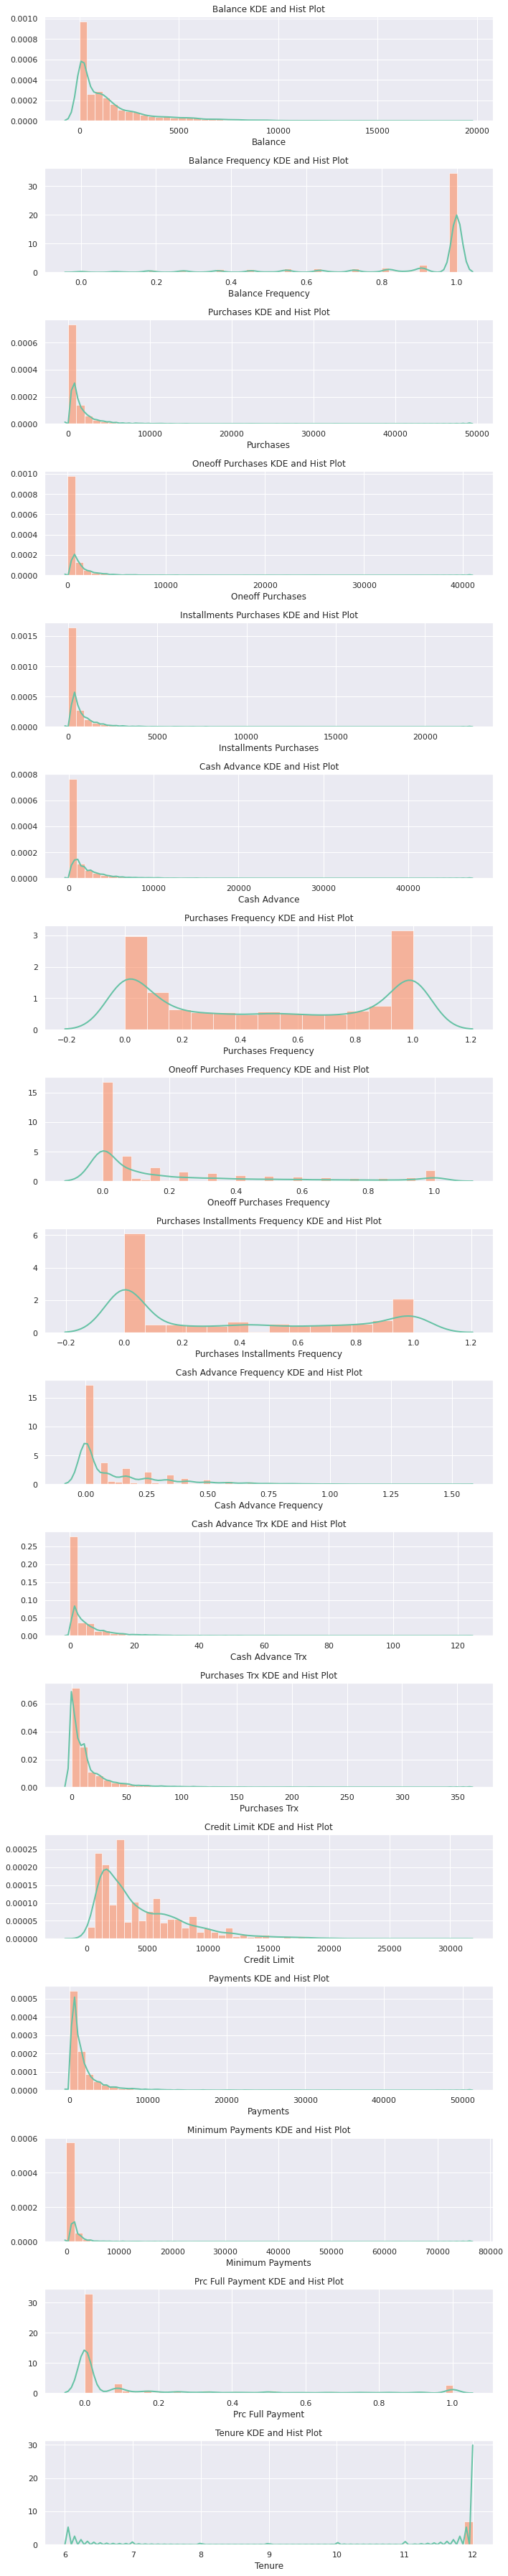

In [13]:
plt.figure(figsize=(10,50))
#Getting the color form Seaborn platte
c1, c2 = sns.color_palette('Set2',2)


for i in range(len(data.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(data[data.columns[i]],
               kde_kws = {'color': c1, 'lw':2},
               hist_kws ={'color': c2, 'alpha':0.6})
  #setting the proper title and axix for the plot
  plt.xlabel(' '.join(data.columns[i].split(sep='_')).title())
  plt.title(f"{' '.join(data.columns[i].split(sep='_')).title()} KDE and Hist Plot")


plt.tight_layout()

* Mean of *balance* is \$1500
* *Balance_Frequency* for most customers is updated frequently ~1
* For *'PURCHASES_FREQUENCY'*, there are two distinct group of customers
* For '*ONEOFF_PURCHASES_FREQUENCY*' and *'PURCHASES_INSTALLMENT_FREQUENCY' * most users don't do one off puchases or installment purchases frequently 
* Very small number of customers pay their balance in full *'PRC_FULL_PAYMENT'* 0
* Credit limit average is around $4500
* Most customers are ~11 years tenure

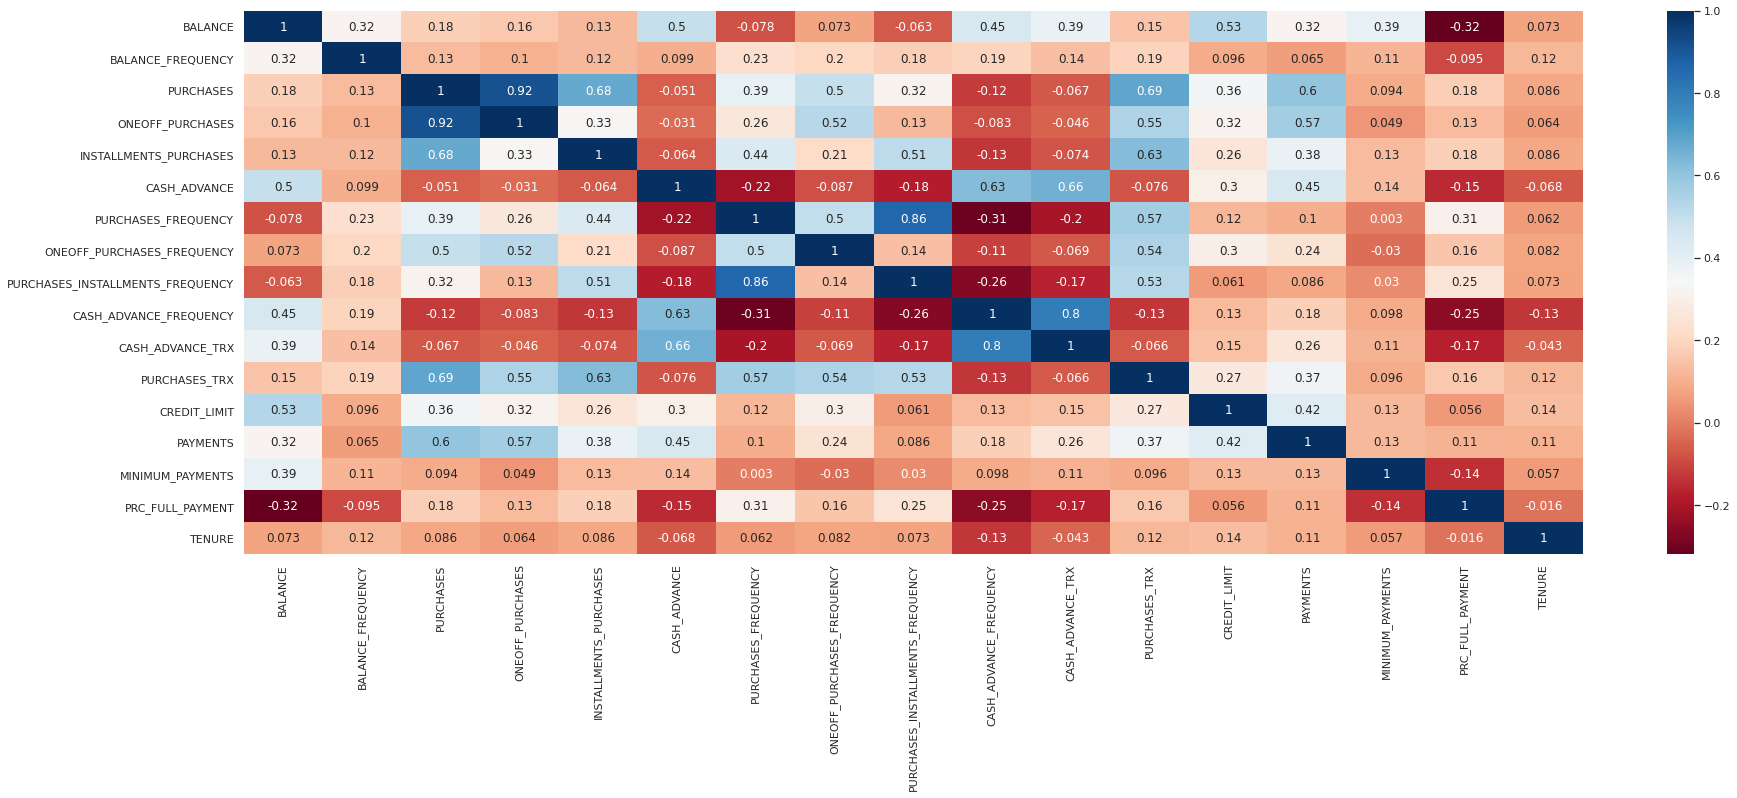

In [14]:
#Let's investigate correlation between each values
correlation = data.corr()
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(correlation, annot=True, cmap='RdBu')



In [15]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

* 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
* Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
* 'CASH_ADVANCE_TRX' correlated with 'CASH_ADVANCE_FREQUENCY' and  'CASH_ADVANCE'

## UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

* Before we actually apply the algorithm we need to know what is the optimal number of clusters.

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [17]:
#FIND THE OPTIMUM CLUSTER FOR THE KMEANS MODEL
#collect the scores 
scores_1 = []

range_of_cluster = range(1,20)

for i in range_of_cluster:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_data)
  print(f"{i} Cluster score: {kmeans.inertia_}")
  scores_1.append(kmeans.inertia_)

1 Cluster score: 152150.00000000003
2 Cluster score: 127784.85342641818
3 Cluster score: 111986.6980661013
4 Cluster score: 99074.42270603366
5 Cluster score: 91503.39081843373
6 Cluster score: 84852.58401742717
7 Cluster score: 79532.32854113287
8 Cluster score: 74805.89472742677
9 Cluster score: 69845.47720704
10 Cluster score: 66478.97062948957
11 Cluster score: 63633.464401227124
12 Cluster score: 61361.78279584763
13 Cluster score: 59174.33239118915
14 Cluster score: 57491.81829367247
15 Cluster score: 55852.46271666879
16 Cluster score: 54268.72861020656
17 Cluster score: 53001.87790481175
18 Cluster score: 51762.05894944428
19 Cluster score: 50622.26002693605


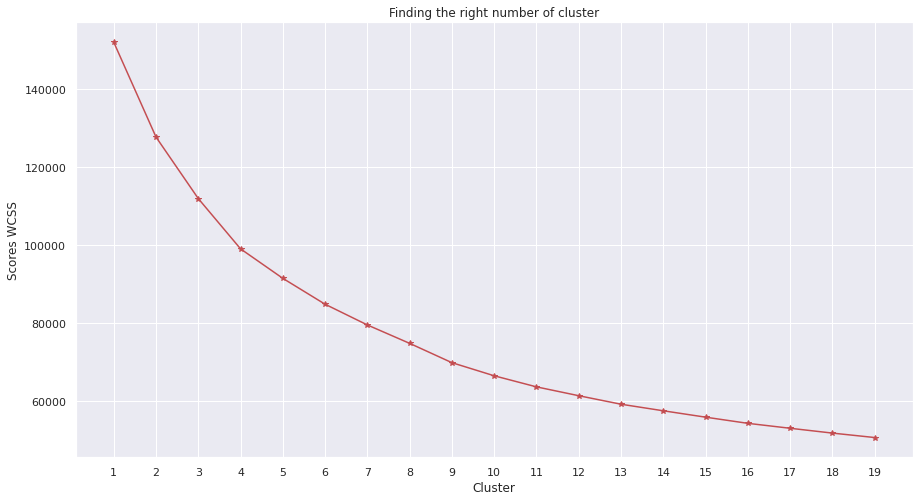

In [18]:
#plot the scores of elbow method to  find the optimum number of clusters
plt.figure(figsize=(15,8))
plt.plot(scores_1, 'r*-')
#fix the cluster representation on th eplot
plt.xticks(np.arange(len(scores_1)), np.arange(1, len(scores_1) +1) )
plt.title('Finding the right number of cluster')
plt.xlabel('Cluster')
plt.ylabel('Scores WCSS')
plt.show()

## APPLY THE KMEANS CLUSTER ALGORITHM





In [19]:
number_of_cluster = 8 
kmeans = KMeans(n_clusters=number_of_cluster)
kmeans.fit(scaled_data)
labels = kmeans.labels_
labels

array([5, 2, 1, ..., 1, 5, 3], dtype=int32)

In [20]:
clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])


In [21]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([2, 3, 1, ..., 7, 7, 7], dtype=int32)

In [22]:
data_with_cluster = pd.concat([data, pd.DataFrame({'CLUSTER': labels})], axis=1)
data_with_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


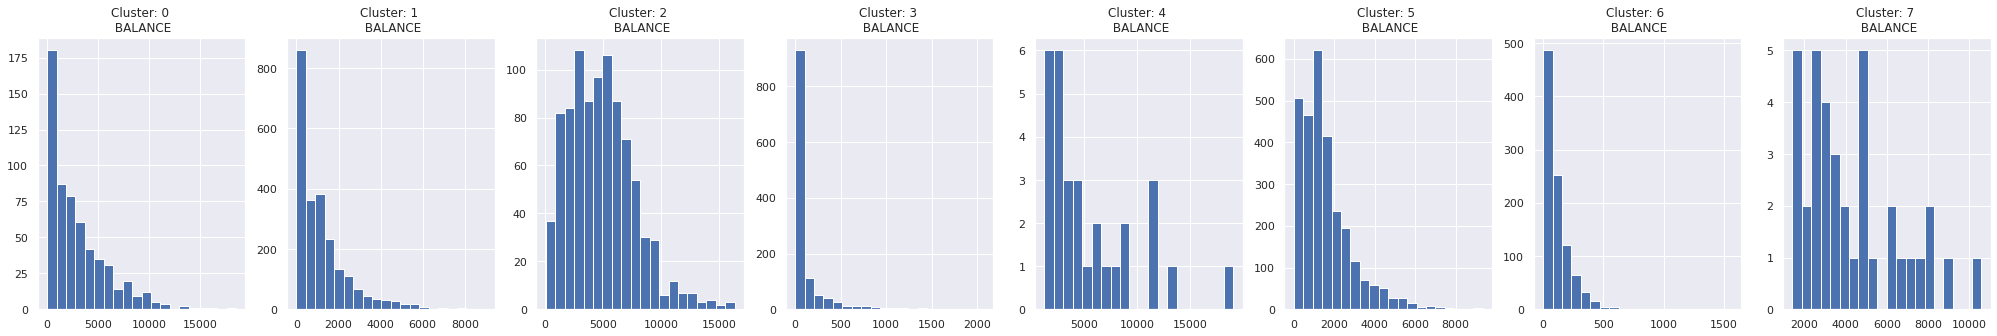

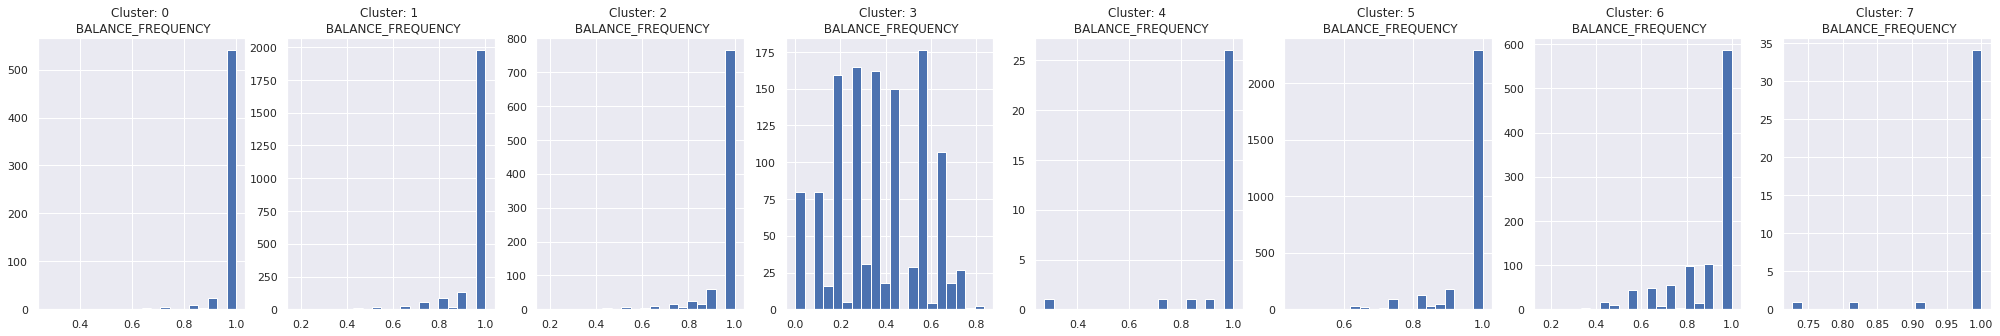

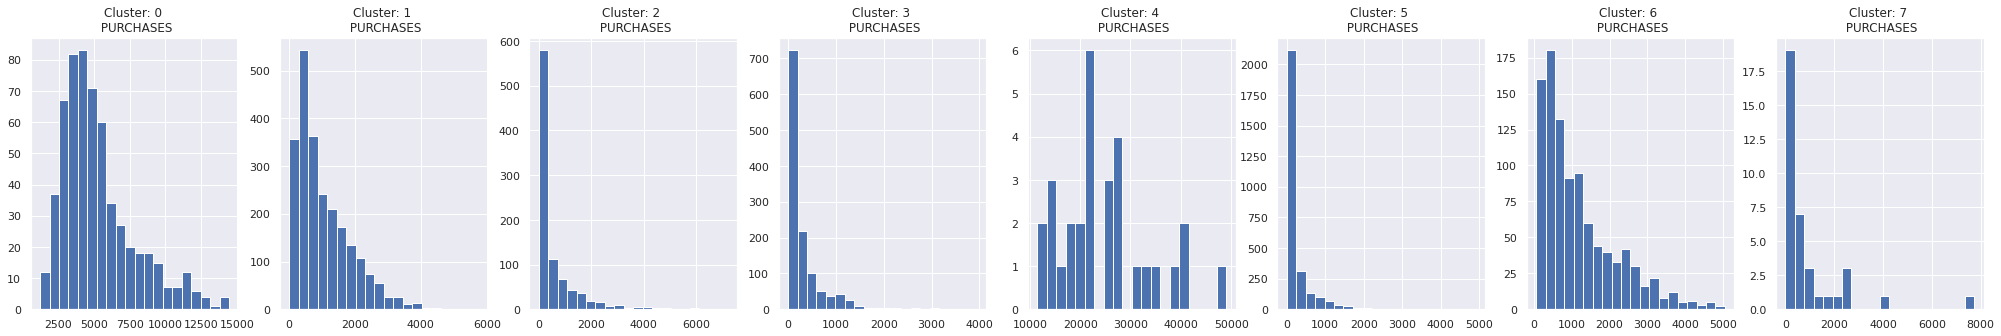

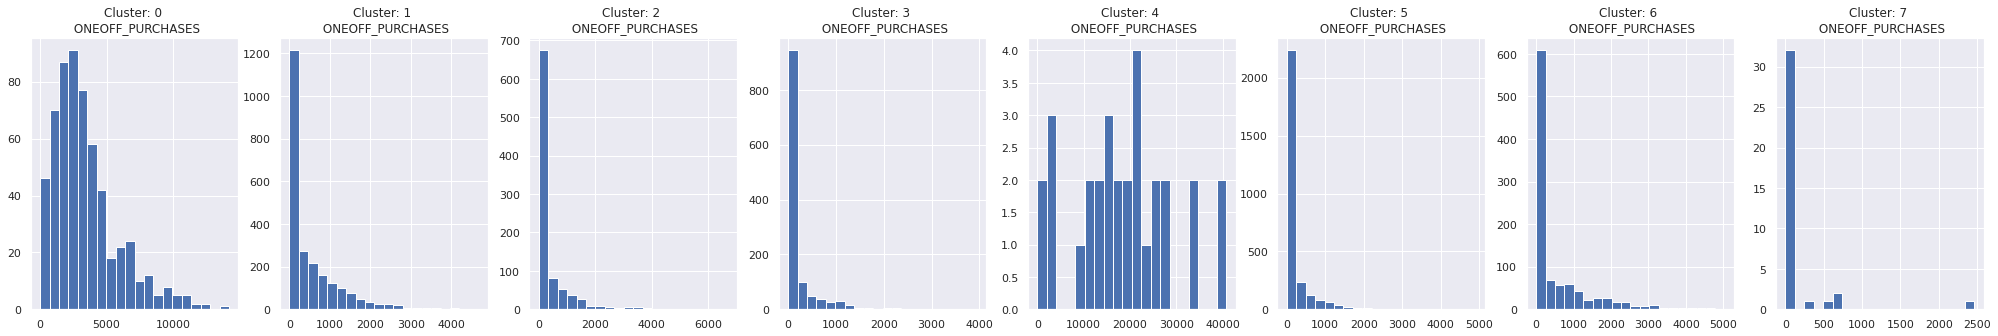

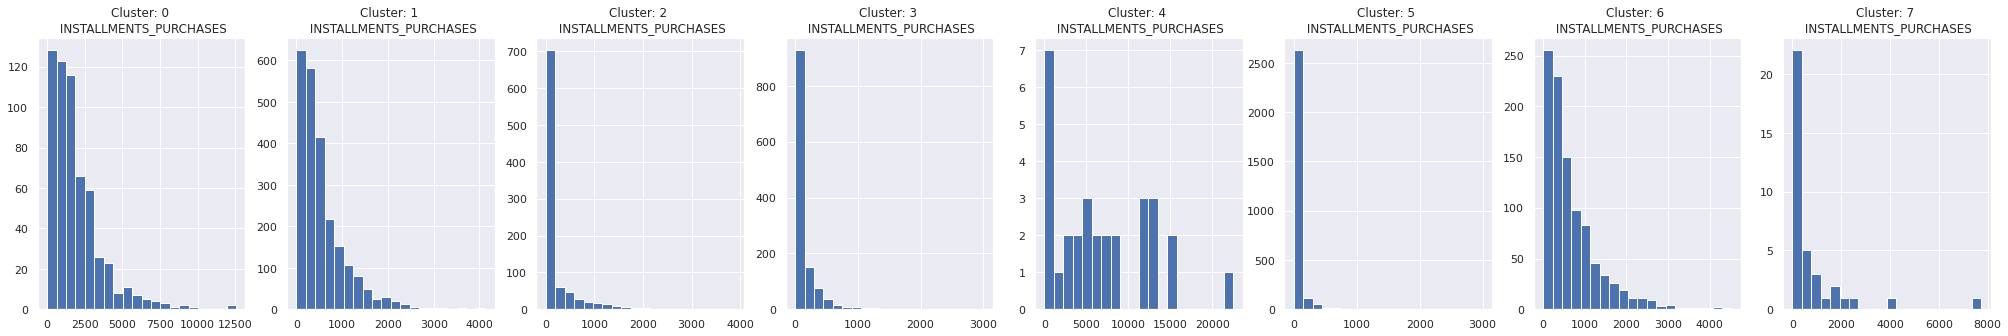

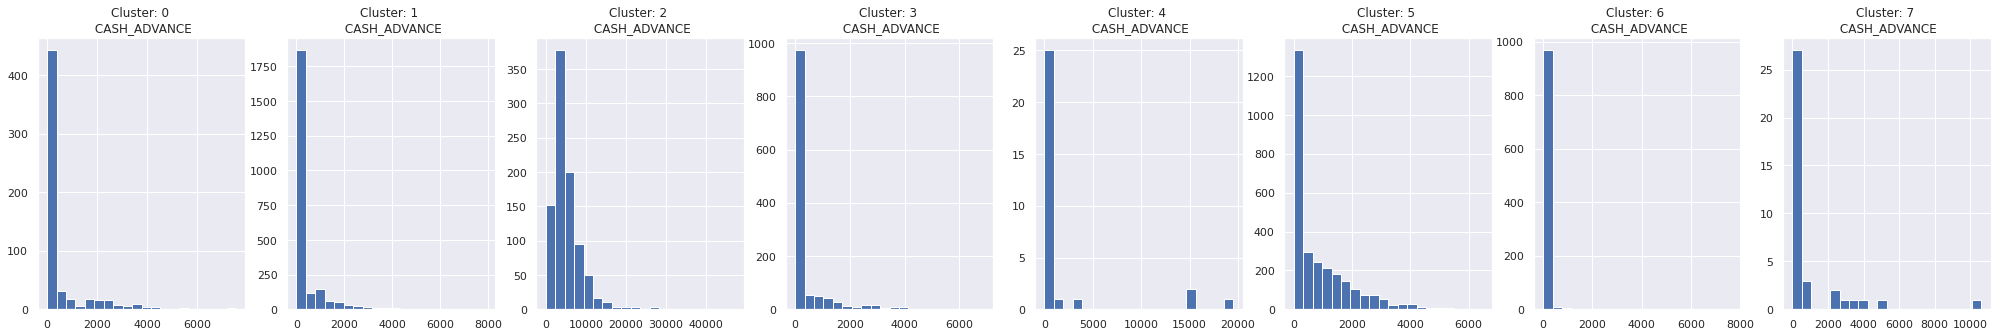

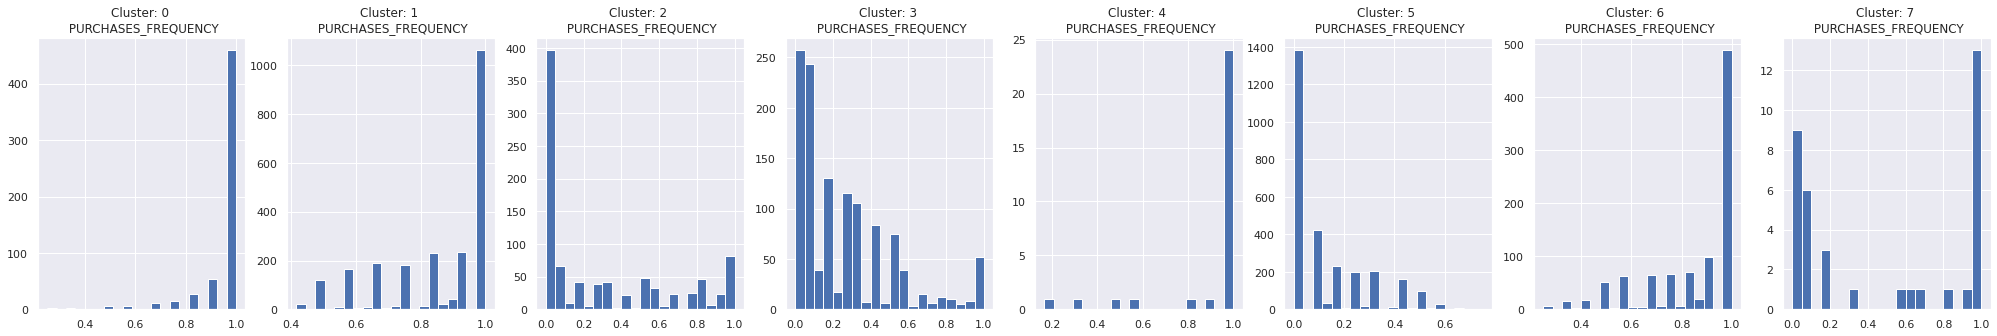

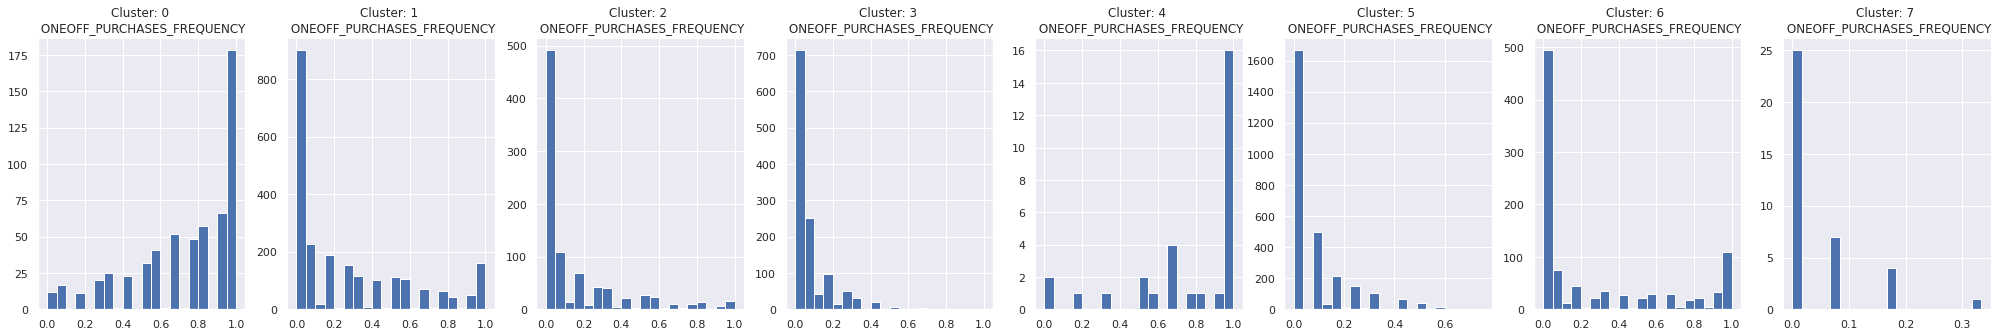

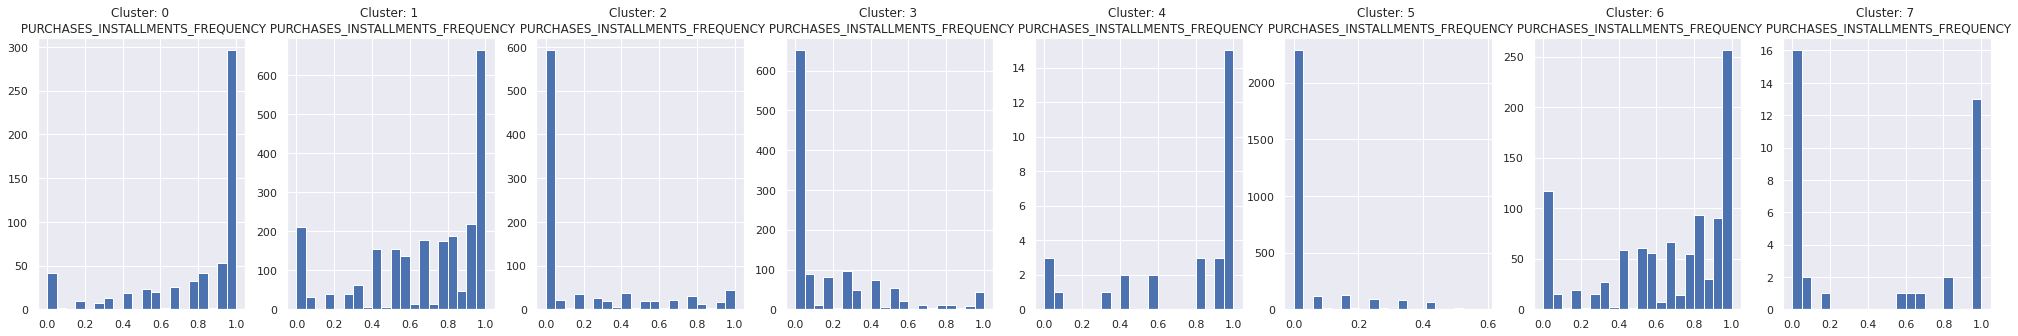

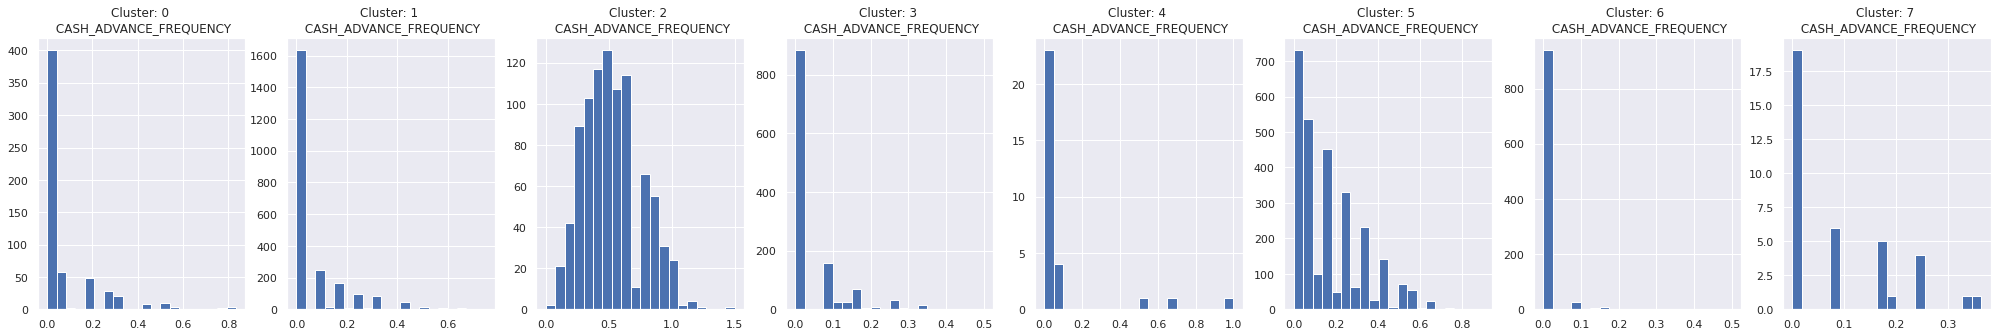

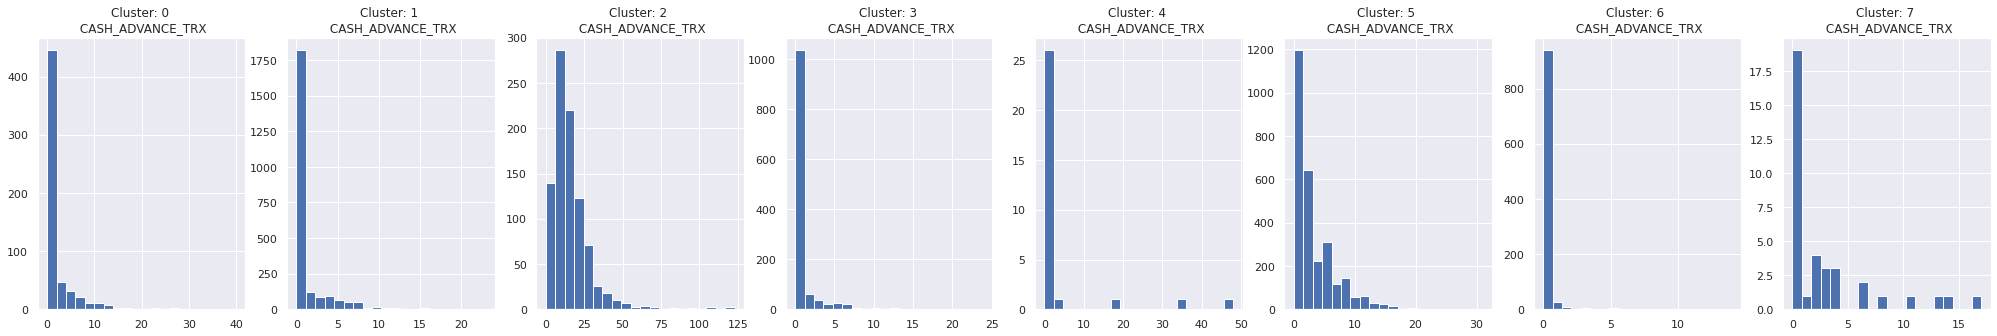

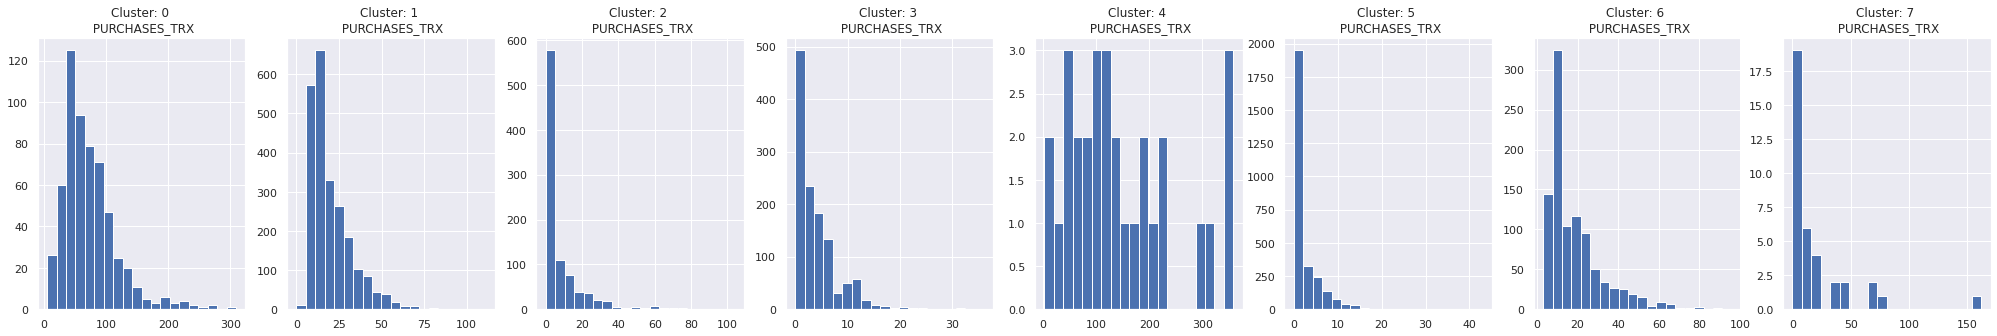

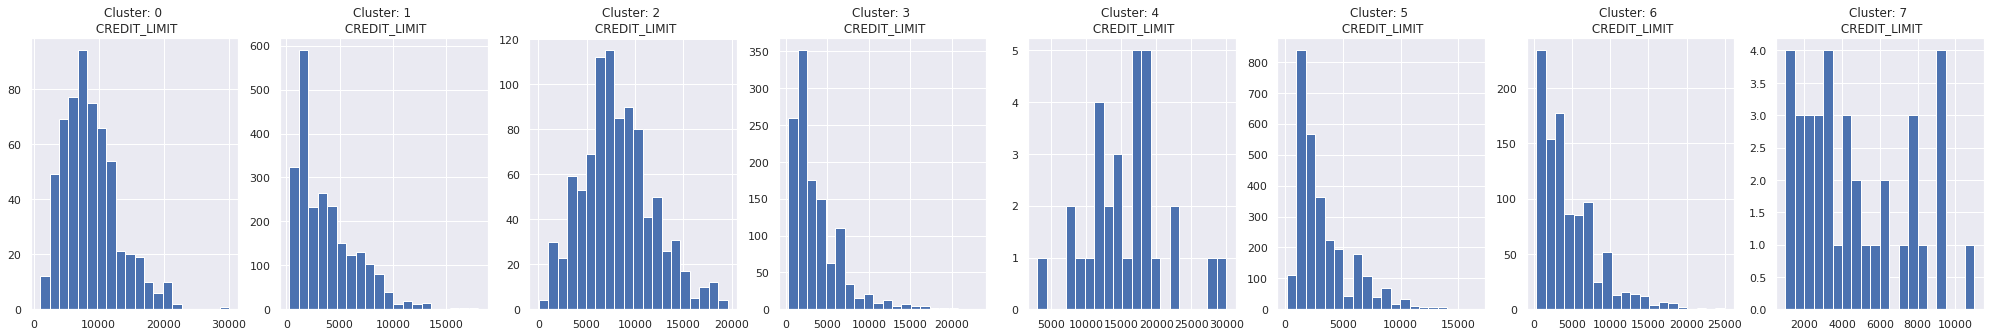

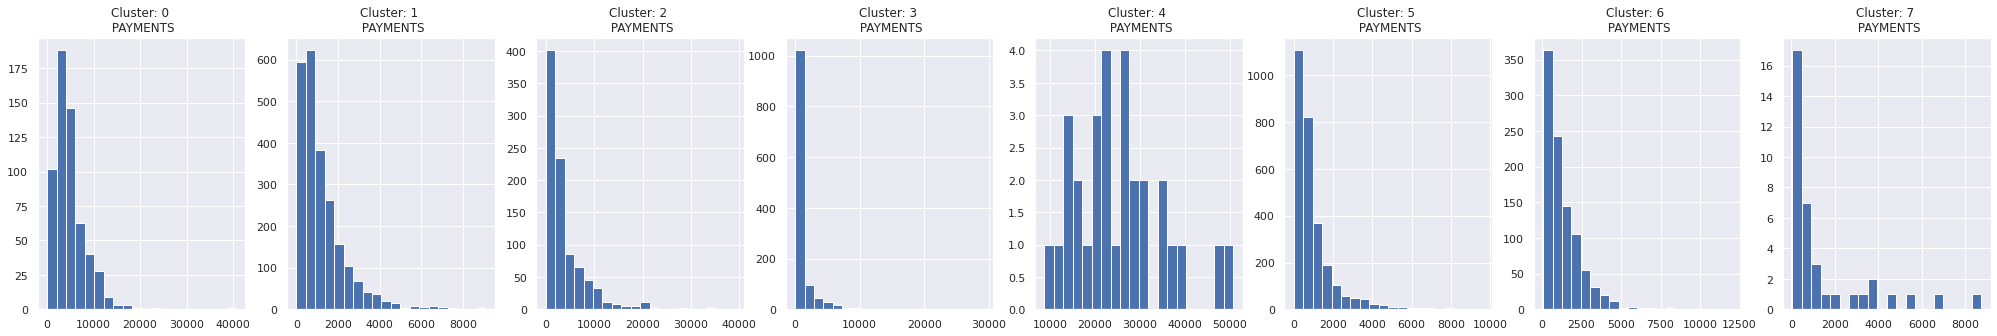

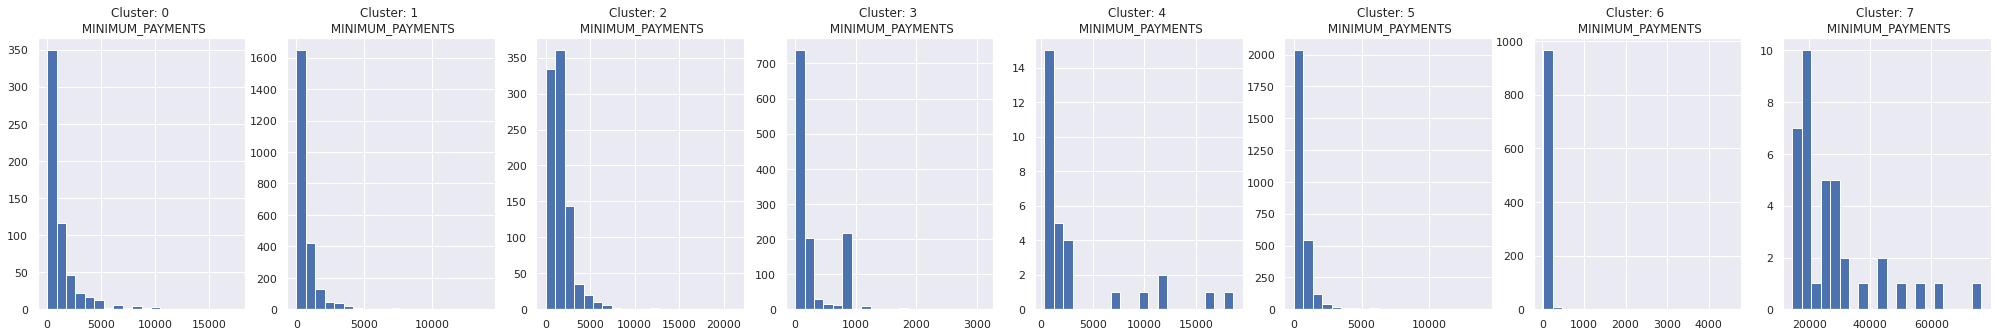

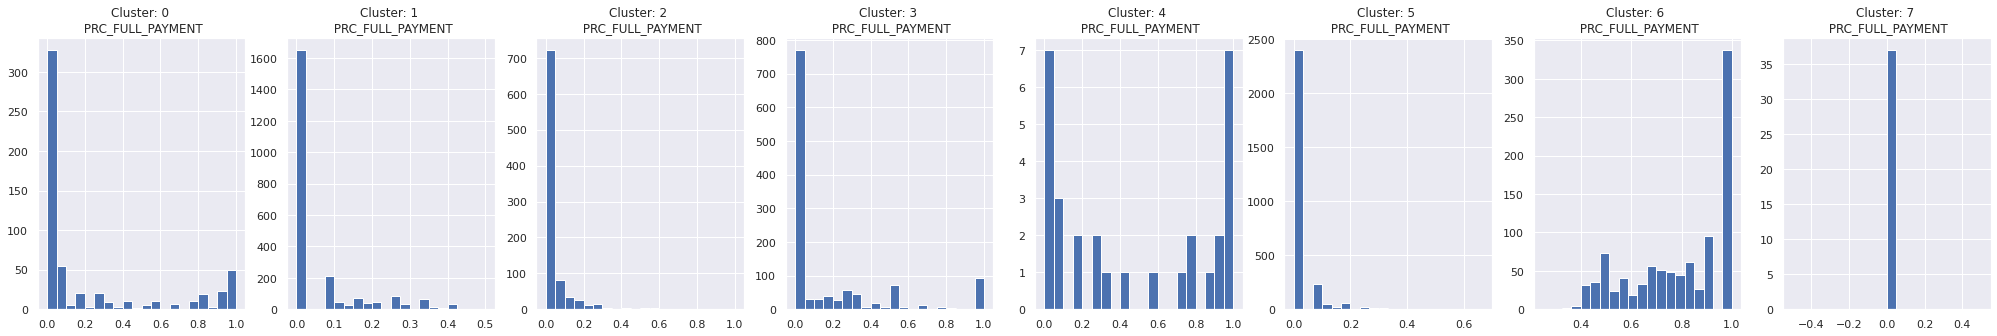

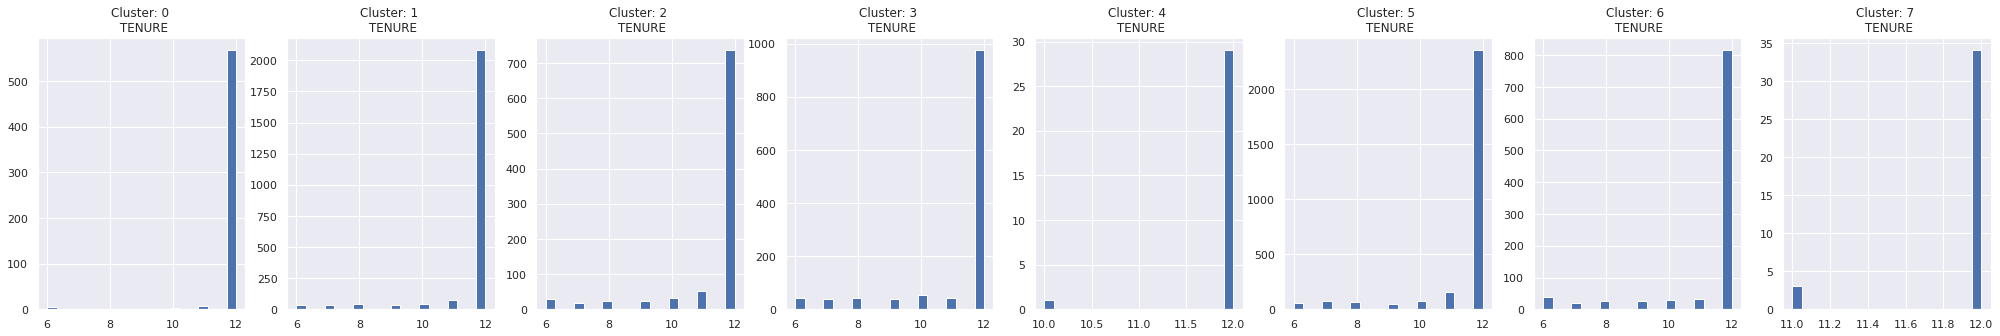

In [23]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in range(number_of_cluster):
    plt.subplot(1,8,j+1)
    cluster = data_with_cluster[data_with_cluster['CLUSTER'] == j]
    cluster[i].hist(bins=20)
    plt.title(f"Cluster: {j} \n {i}")
plt.show()


##  Principal Component Analysis (PCA)
* PCA is a Unsupervised Learning Algorithm
* PCA works find trying to find new set of fetures called component which are composites of the uncorrelated given input fetaures.
* PCA performs dimensionality reduction while attempting a keeping the original information unchanged.




In [24]:
#ontainined PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_with_cluster)
principal_comp

array([[-4326.38413684,   921.56681795],
       [ 4118.91676663, -2432.84634282],
       [ 1497.9078958 , -1997.57855713],
       ...,
       [-4379.44391979,   911.50474161],
       [-4791.11792138,  1032.54088177],
       [-3623.70269766,  1555.1348194 ]])

In [25]:
#create a dataframe from PCA

pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-4326.384137,921.566818
1,4118.916767,-2432.846343
2,1497.907896,-1997.578557
3,1394.548332,-1488.743552
4,-3743.352059,757.342585


In [26]:
#Concantenate the PCA and the clusters
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-4326.384137,921.566818,5
1,4118.916767,-2432.846343,2
2,1497.907896,-1997.578557,1
3,1394.548332,-1488.743552,5
4,-3743.352059,757.342585,5


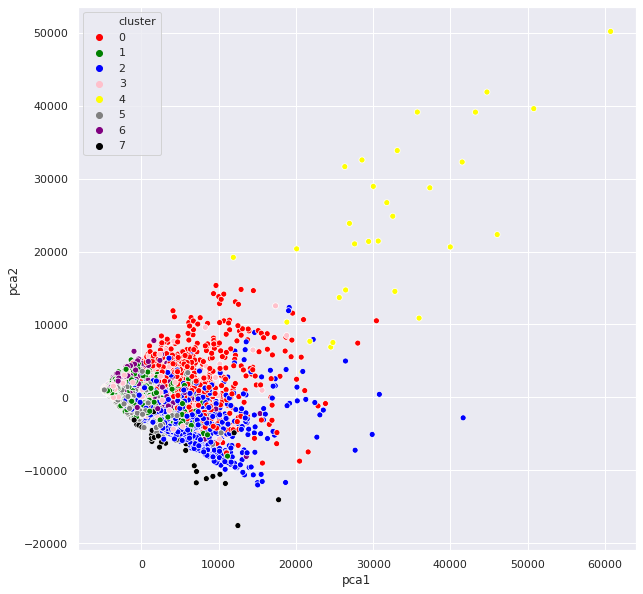

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'] )

 ## APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [33]:
from tensorflow.keras.layers import Input, Add, Dense,  Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import  Model  , load_model
from tensorflow.keras.initializers import  glorot_uniform
from keras.optimizers import  SGD

In [45]:
input_df = Input(shape=(17,))

x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder= Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
scaled_data.shape

(8950, 17)

In [46]:
autoencoder.fit(scaled_data, scaled_data, batch_size=128, epochs=25, verbose= 1)

Epoch 1/25
70/70 [==============================] - 4s 54ms/step - loss: 0.5464
Epoch 2/25
70/70 [==============================] - 4s 53ms/step - loss: 0.3317
Epoch 3/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2369
Epoch 4/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1938
Epoch 5/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1691
Epoch 6/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1515
Epoch 7/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1398
Epoch 8/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1233
Epoch 9/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1139
Epoch 10/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1061
Epoch 11/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0982
Epoch 12/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0895
Epoch 13/25
70/70 [==================

In [47]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 17)]              0         
_________________________________________________________________
dense_77 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_78 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_79 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_80 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_81 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_82 (Dense)             (None, 2000)              220

In [49]:
#we are taking only encoder part
pred = encoder.predict(scaled_data)
pred.shape

(8950, 10)

1 Cluster score: 71232.796875
2 Cluster score: 50746.0618456534
3 Cluster score: 43624.2969716968
4 Cluster score: 38586.46724381482
5 Cluster score: 35018.375932361494
6 Cluster score: 32225.666362787284
7 Cluster score: 30301.527214428046
8 Cluster score: 28822.125808152105
9 Cluster score: 27561.59951691656
10 Cluster score: 26534.214089277935
11 Cluster score: 25706.707781576344
12 Cluster score: 24736.23518741967
13 Cluster score: 23966.26401077878
14 Cluster score: 23222.075413987637
15 Cluster score: 22435.997258983458
16 Cluster score: 21819.629539027967
17 Cluster score: 21060.989211294476
18 Cluster score: 20497.249736689206
19 Cluster score: 20041.435322989415


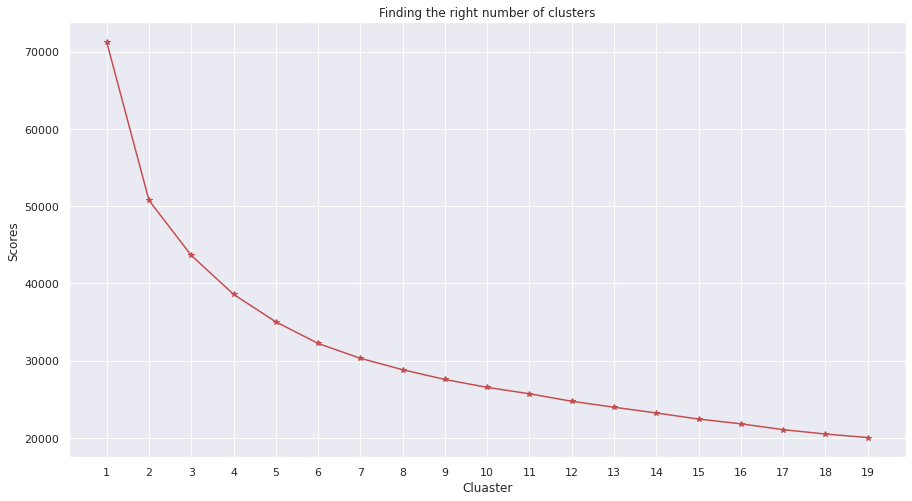

In [51]:
#we have 10 features right now
#we are going to use pred as out new data with 10 features
 
 #optimum number of cluster
#calcaulated the score for Pred
scores_2 = []
for i in range_of_cluster:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
  
  print(f"{i} Cluster score: {kmeans.inertia_}")

plt.figure(figsize=(15,8)) 
plt.plot(scores_2, 'r*-')
plt.xticks(np.arange(len(scores_2)), np.arange(1, len(scores_2)+1))
plt.title('Finding the right number of clusters')
plt.xlabel('Cluaster')
plt.ylabel('Scores')
plt.show()


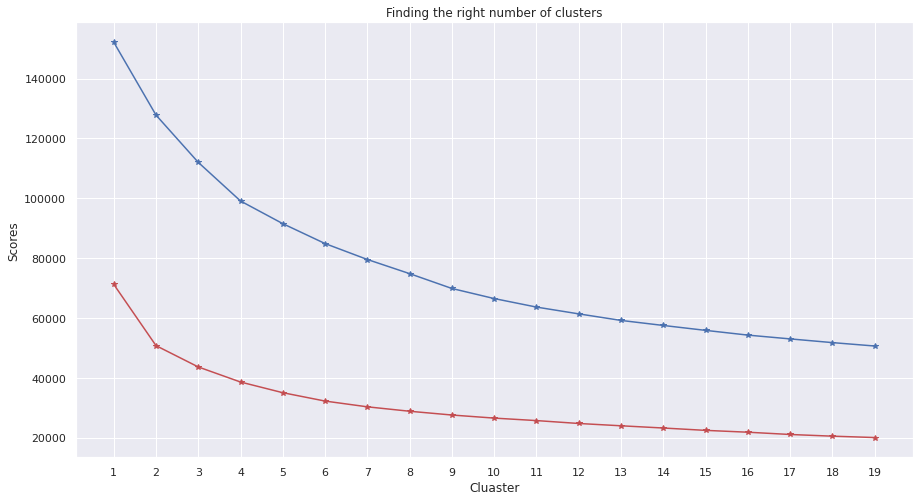

In [63]:
plt.figure(figsize=(15,8)) 
plt.plot(scores_2, 'r*-')
plt.plot(scores_1, 'b*-')
plt.xticks(np.arange(len(scores_2)), np.arange(1, len(scores_2)+1))
plt.title('Finding the right number of clusters')
plt.xlabel('Cluaster')
plt.ylabel('Scores')
plt.show()

In [64]:
#apply kmeans

number_of_cluster = 4

kmeans = KMeans(n_clusters=number_of_cluster)
kmeans.fit(pred)
labels = kmeans.labels_
labels

array([0, 2, 3, ..., 0, 0, 0], dtype=int32)

In [65]:
data_auto_with_cluster = pd.concat([data, pd.DataFrame({'CLUSTER': labels})], axis=1)
data_auto_with_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


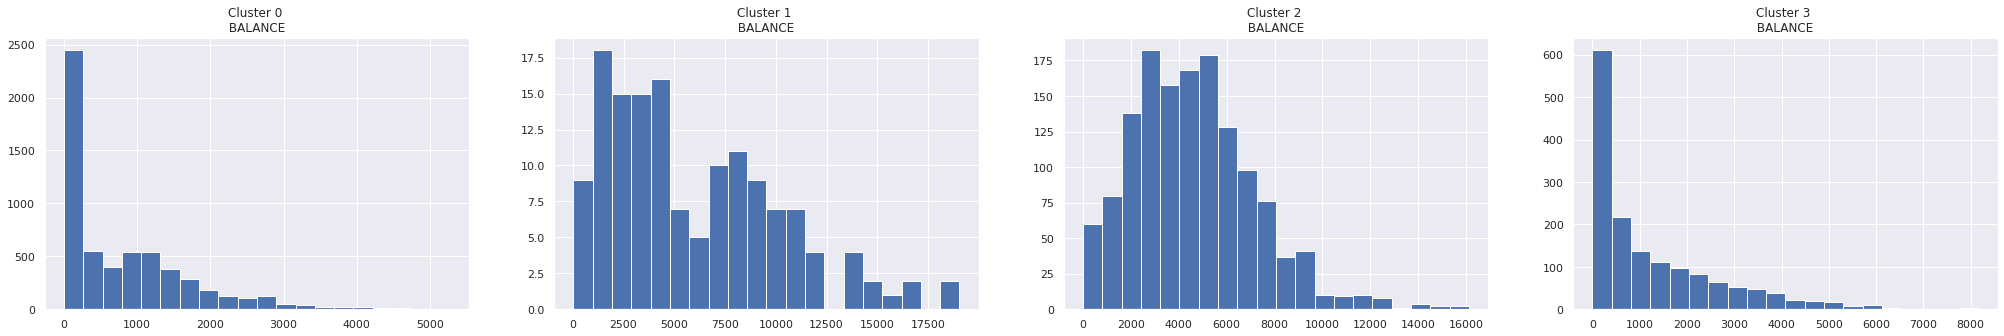

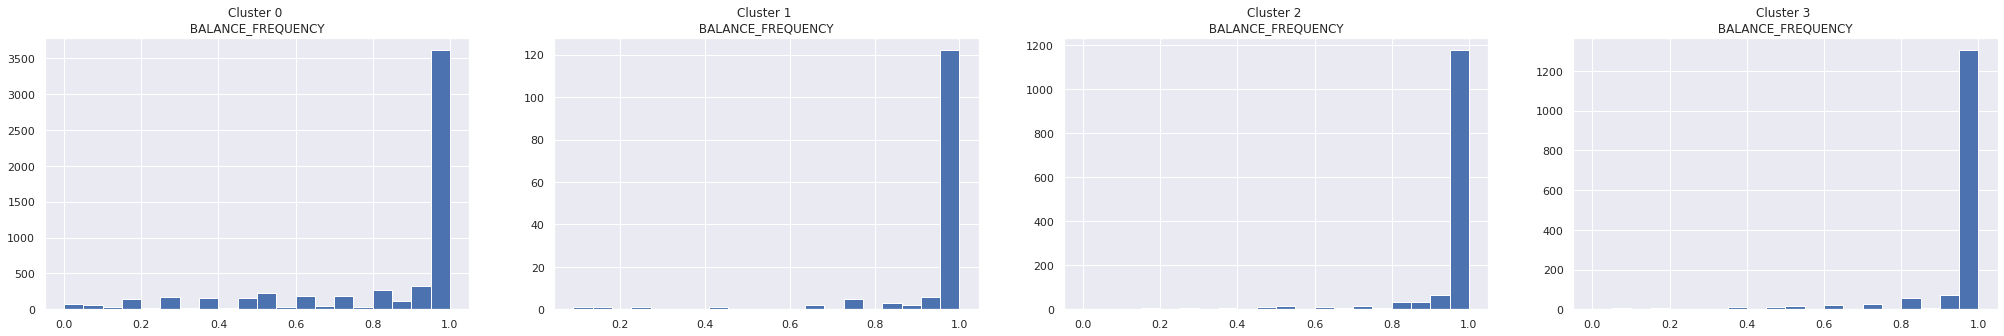

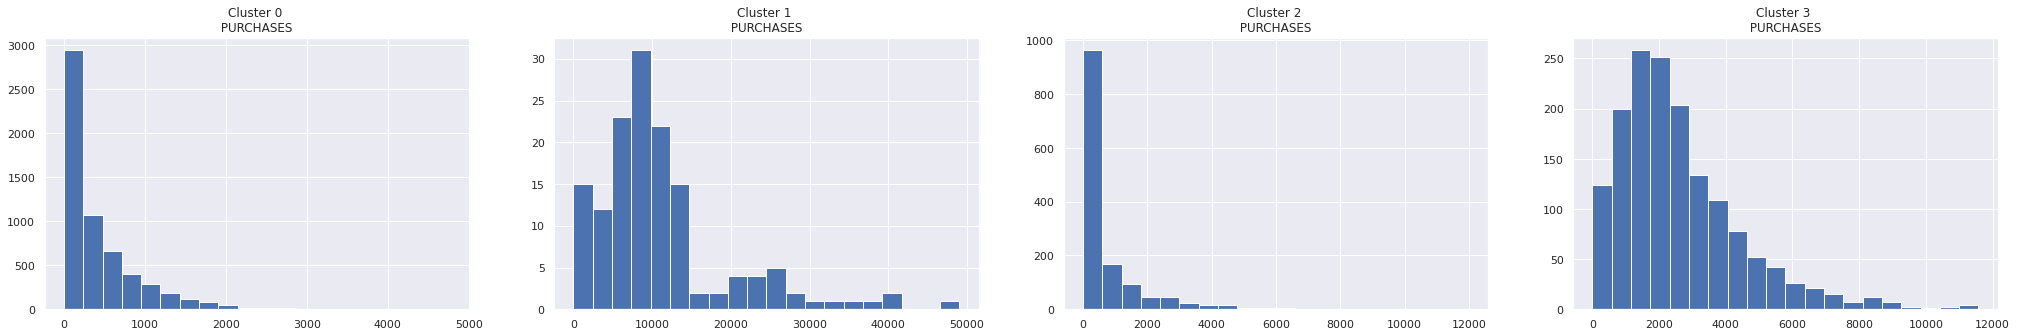

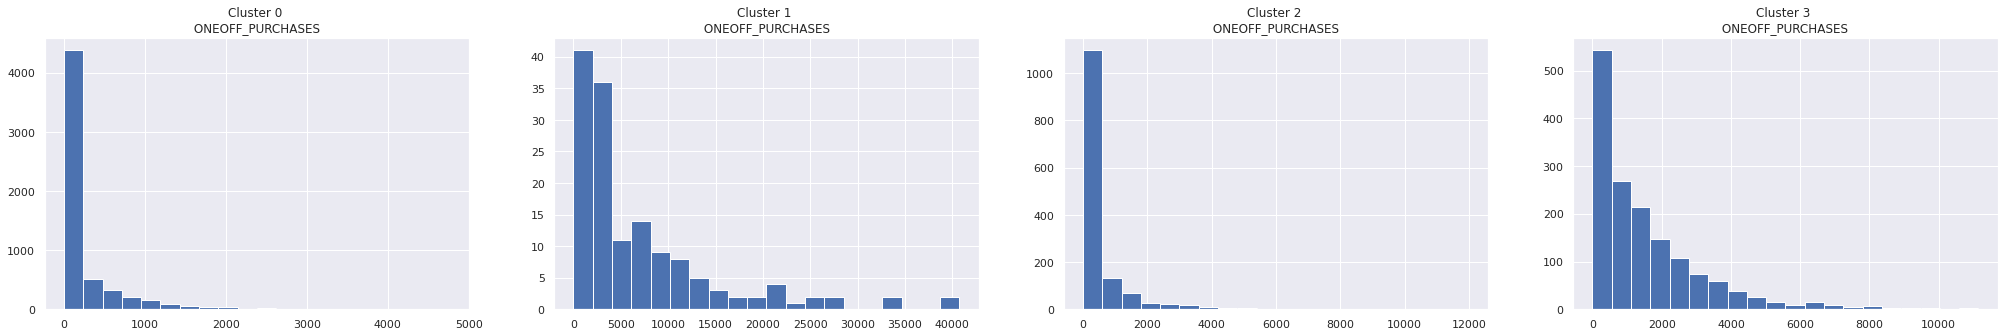

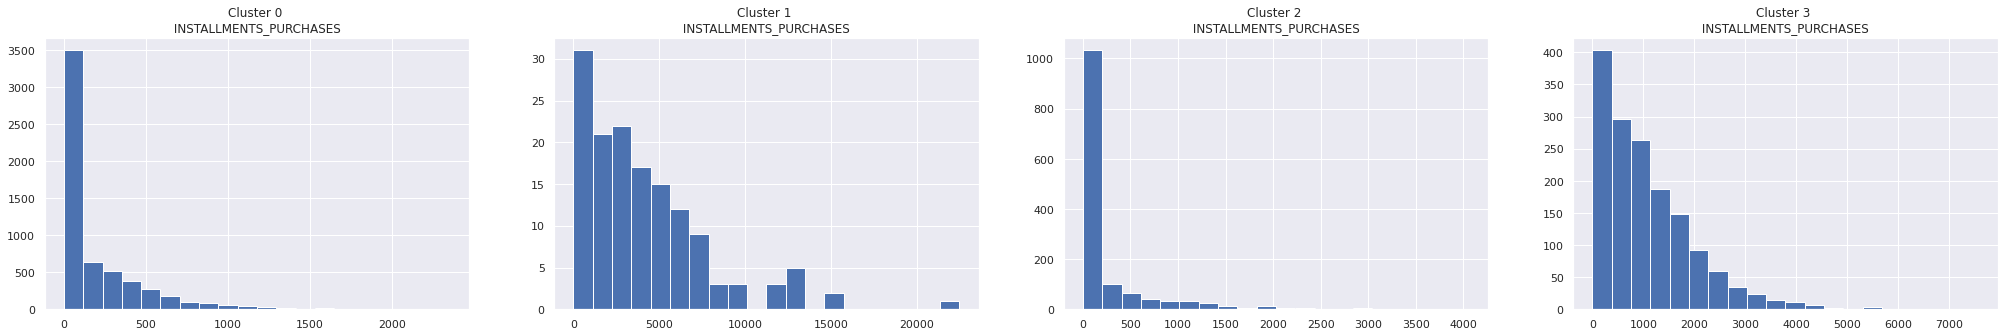

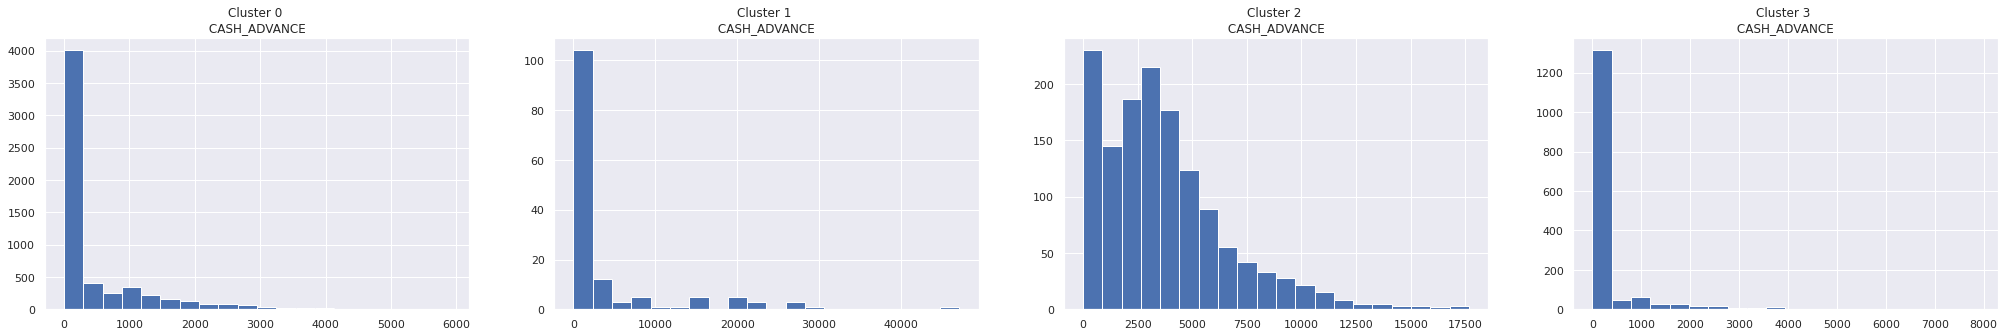

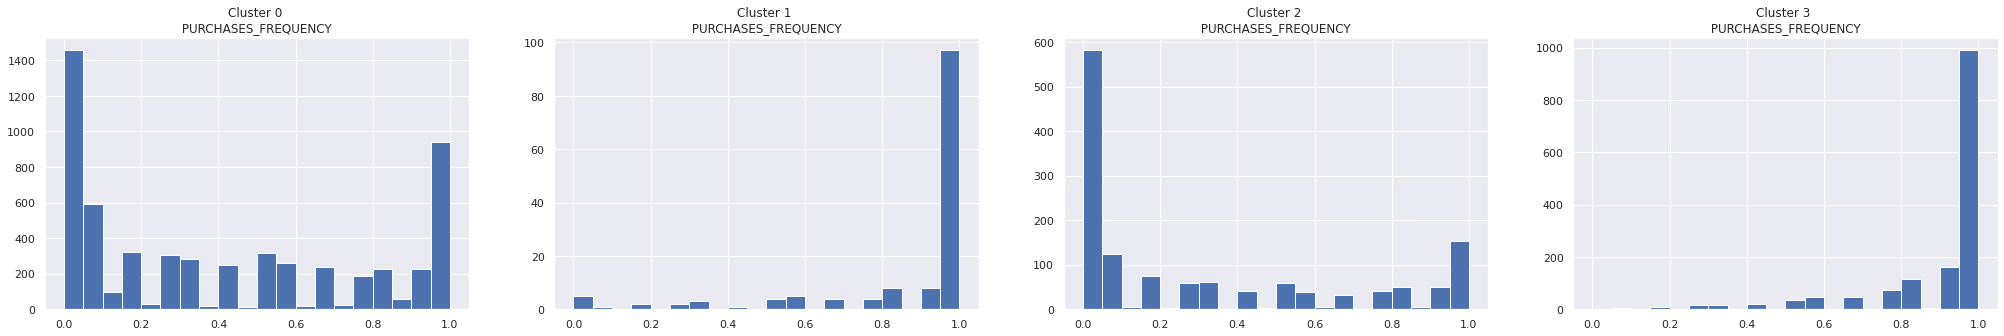

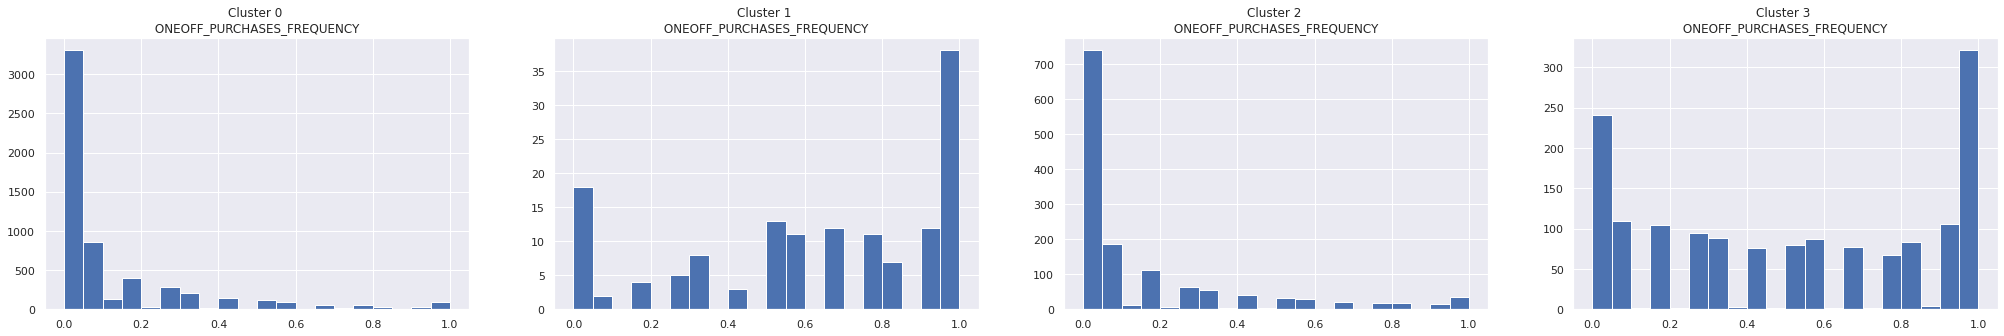

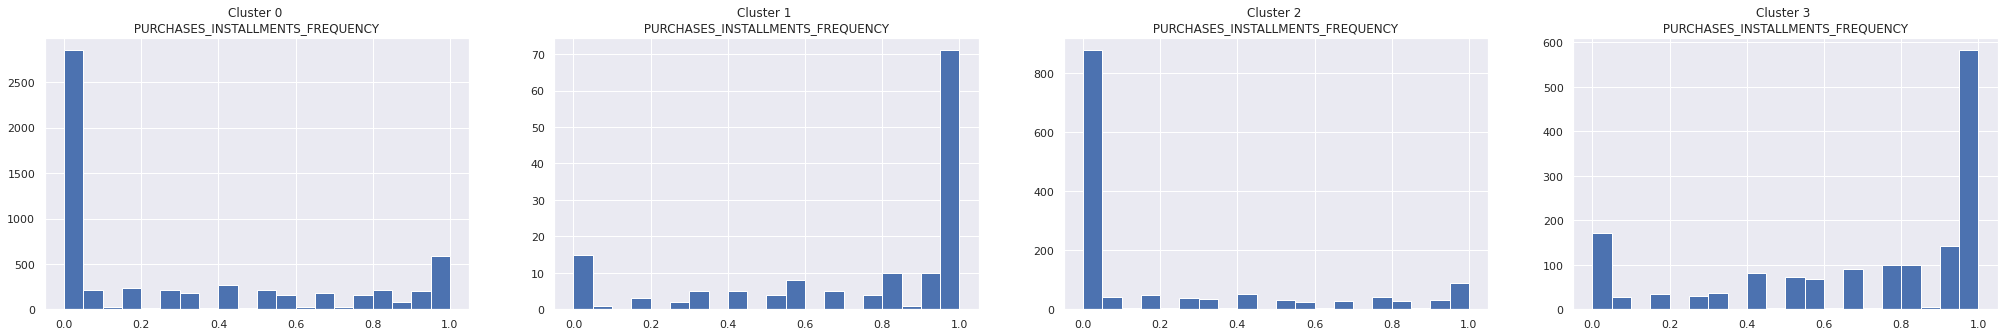

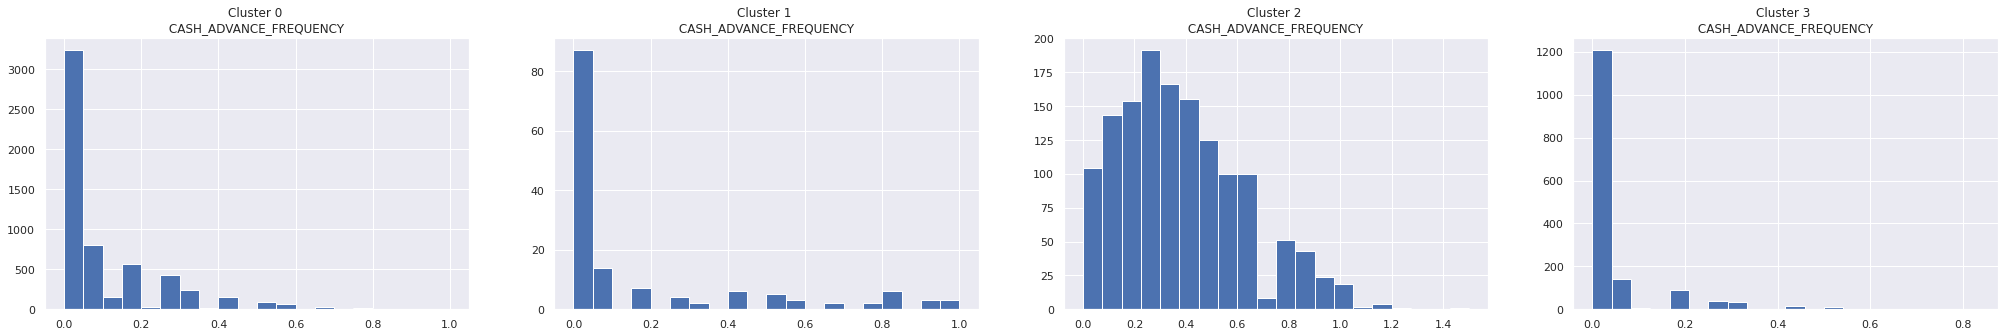

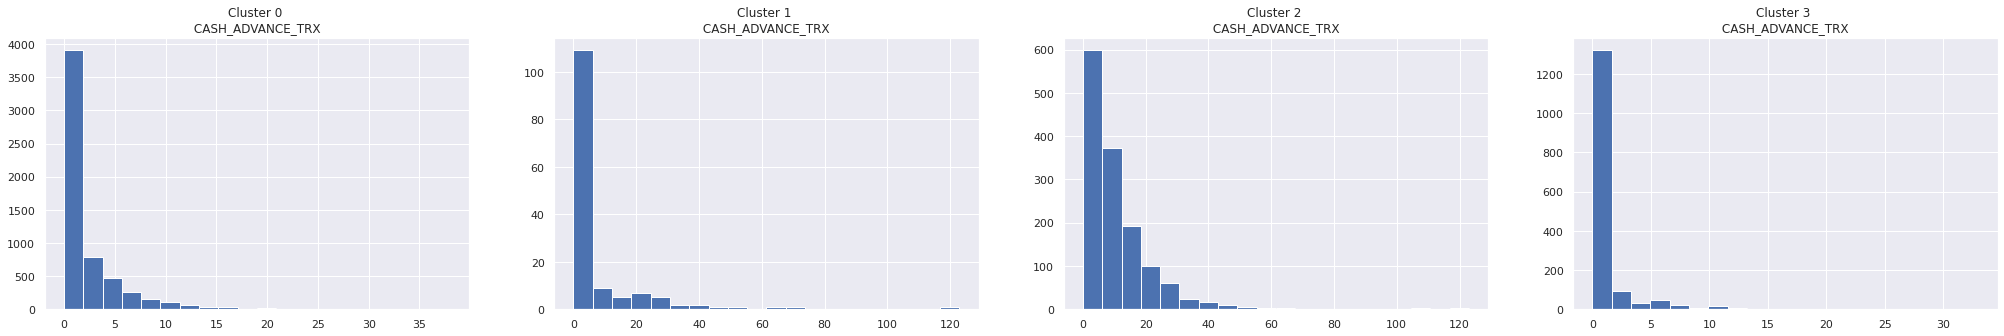

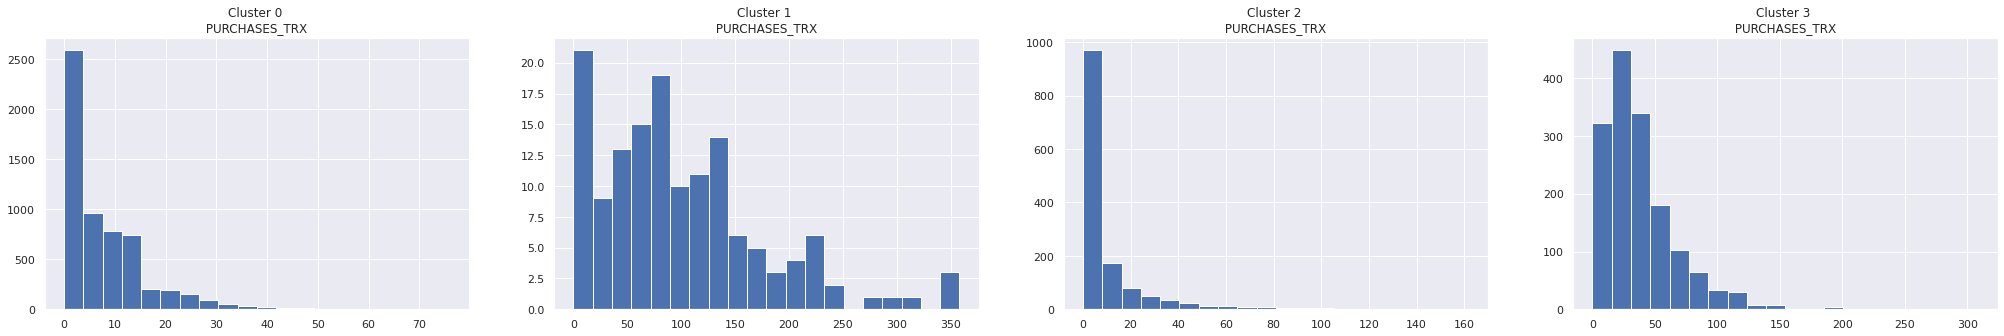

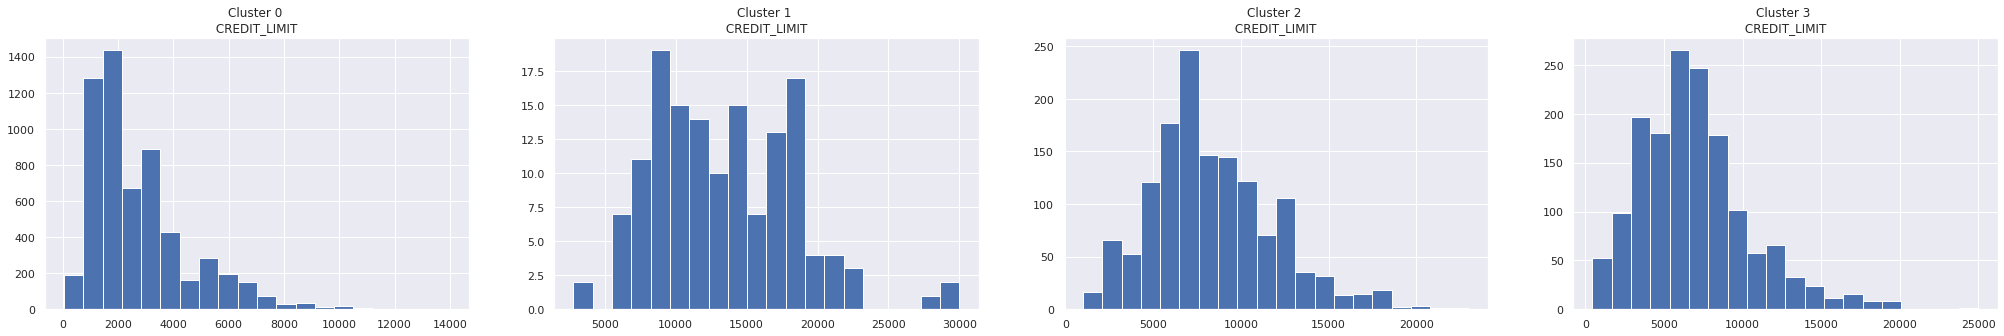

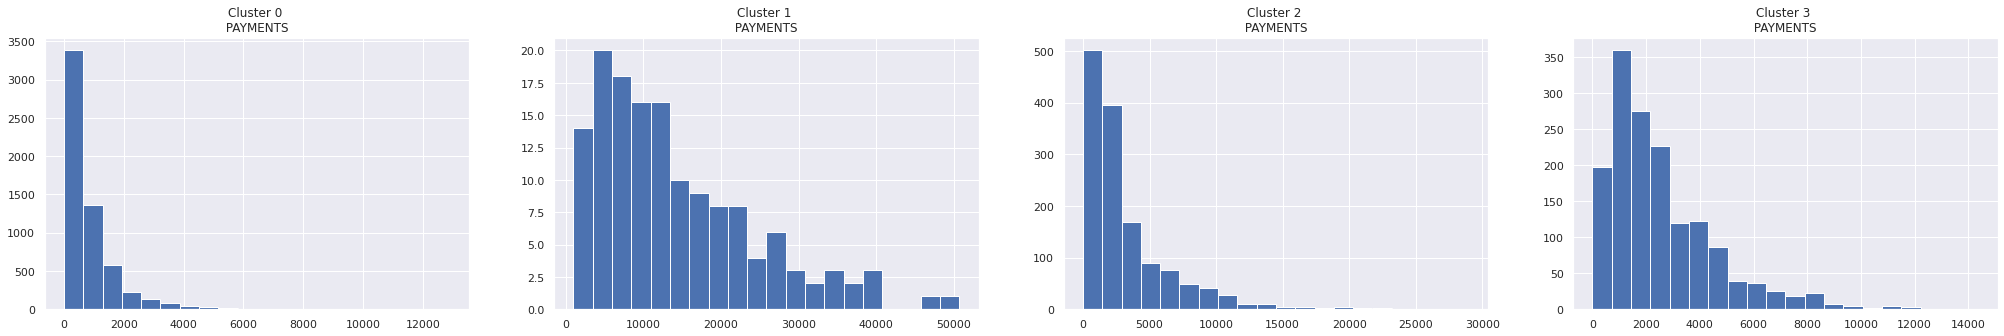

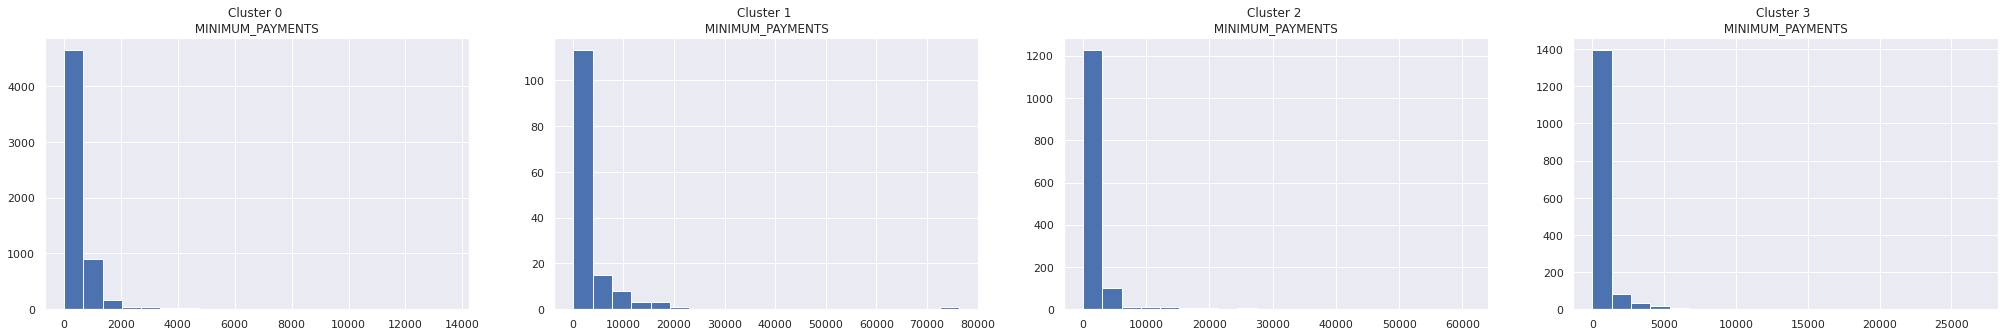

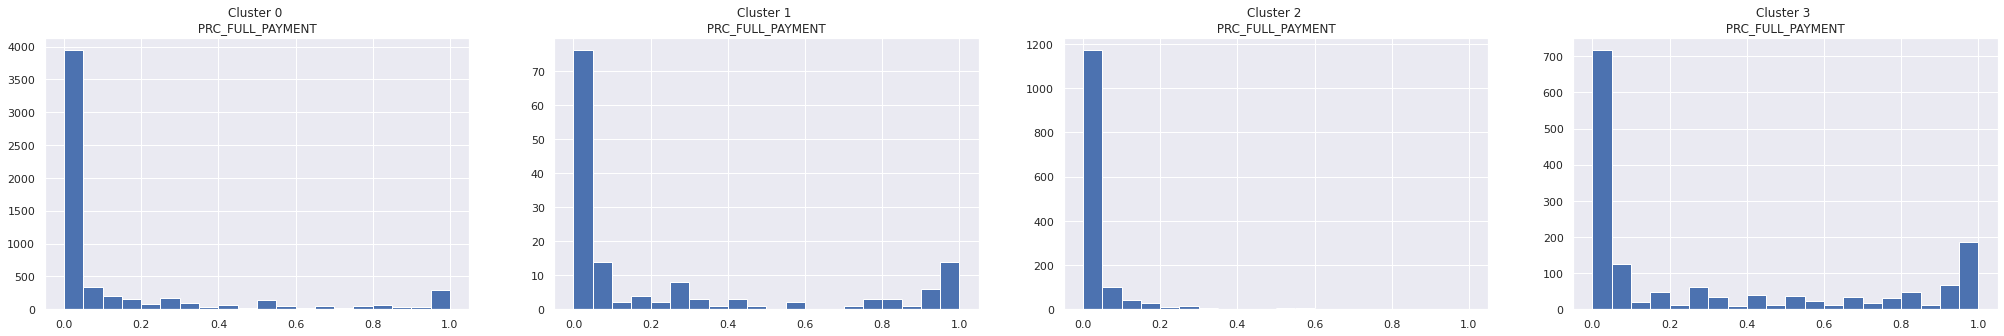

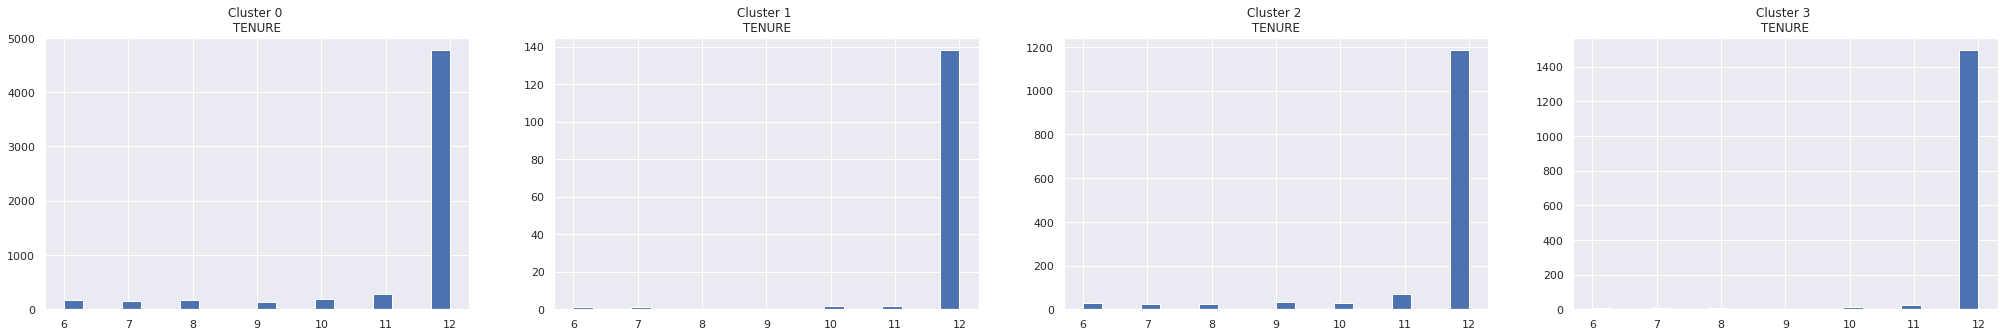

In [66]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in range(number_of_cluster):
    plt.subplot(1, number_of_cluster, j+1)
    cluster = data_auto_with_cluster[data_auto_with_cluster['CLUSTER'] == j]
    cluster[i].hist(bins=20)
    plt.title(f"Cluster {j} \n {i} ")
plt.show()

In [67]:
#PCA

pca = PCA(n_components=2)
principal_comp_auto = pca.fit_transform(pred)
principal_comp_auto


array([[-1.8531233 , -0.22149931],
       [ 2.114382  , -1.1872467 ],
       [ 0.63124883, -0.23392665],
       ...,
       [-1.1787108 ,  0.7445214 ],
       [-1.2097541 ,  0.15826815],
       [-1.0754215 ,  0.4735394 ]], dtype=float32)

In [68]:
pca_auto_df = pd.DataFrame(data=principal_comp_auto, columns=['pca1','pca2'])

In [69]:
pca_auto_df = pd.concat([pca_auto_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_auto_df.head()

,pca1,pca2,cluster
0,-1.853123,-0.221499,0
1,2.114382,-1.187247,2
2,0.631249,-0.233927,3
3,0.384866,-0.418326,0
4,-1.573507,-0.466402,0


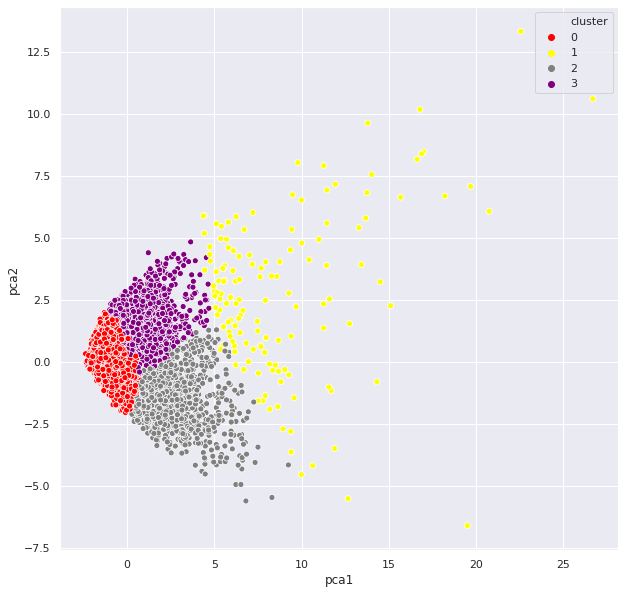

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_auto_df,
                palette=['red','yellow','gray','purple'])
plt.show()